,Fertilizer,temp,N,P,K,yeild
0,80.0,28.0,80.0,24.0,20.0,12.0
1,77.0,27.0,78.0,23.0,20.0,12.0
2,80.0,26.0,80.0,24.0,20.0,12.0
3,80.0,28.0,80.0,24.0,20.0,12.0
4,78.0,27.0,78.0,23.0,19.0,12.0


R² Score: 0.868
Mean Absolute Error: 0.592
Root Mean Squared Error: 0.722


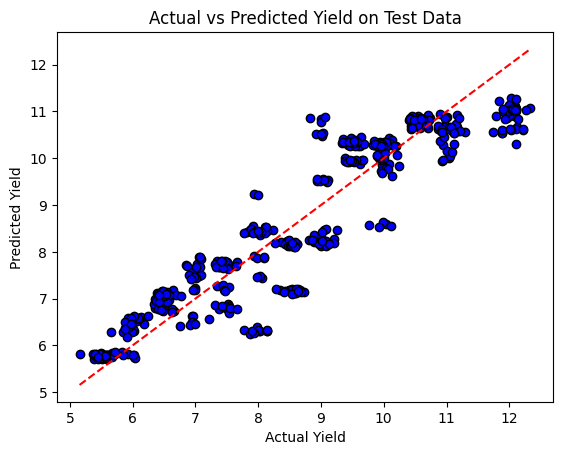

   Actual Yield  Predicted Yield
0      6.019040         6.312776
1      8.364318         8.219178
2     10.522461        10.695574
3      5.656995         6.293063
4      8.492420         7.175196
5     11.000000        10.882019
6      6.358882         6.796911
7      5.902084         6.305899
8     12.109238        11.014395
9      7.021662         7.473442


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import warnings 

X =df[['Fertilizer','temp','N','P','K']]
y=df['yeild']

df=pd.read_csv(r"D:\sem5\predictive analysis\croppredictor\Crop Yiled with Soil and Weather.csv")
df.head()
for state in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

    


plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield on Test Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

comparison = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})
print(comparison.head(10))

***Random Forest***

R² Score: 0.987
Mean Absolute Error: 0.134
Root Mean Squared Error: 0.228


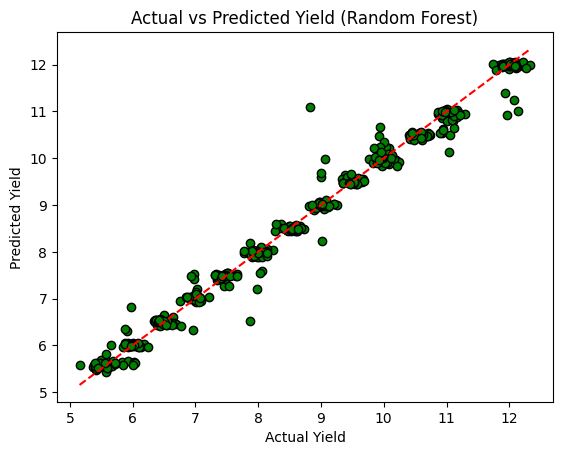

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,       # for reproducibility
    max_depth=None,        # let trees expand fully (you can tune this)
    min_samples_split=2,   # minimum samples to split node
)

# Train (fit) the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#model scores
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
plt.scatter(y_test, y_pred, color='green', edgecolors='k')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

***XG BOOST***

R² Score: 0.987
Mean Absolute Error: 0.144
Root Mean Squared Error: 0.223


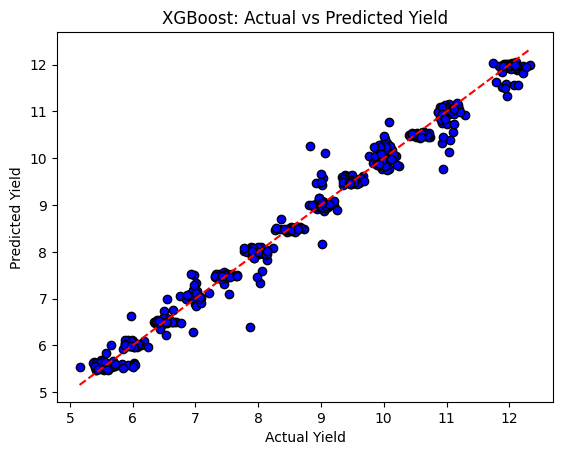

   Actual Yield  Predicted Yield
0      6.019040         5.966099
1      8.364318         8.703332
2     10.522461        10.535683
3      5.656995         6.006475
4      8.492420         8.498099
5     11.000000        10.926990
6      6.358882         6.476819
7      5.902084         6.039538
8     12.109238        11.984144
9      7.021662         7.043970


In [5]:
from xgboost import XGBRegressor

for state in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state
    )

    model_xg = XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=state,
        objective='reg:squarederror'
    )

    model_xg.fit(X_train, y_train)
    y_pred = model_xg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("XGBoost: Actual vs Predicted Yield")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

comparison = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})
print(comparison.head(10))


R² Score: 0.992
Mean Absolute Error: 0.119
Root Mean Squared Error: 0.180


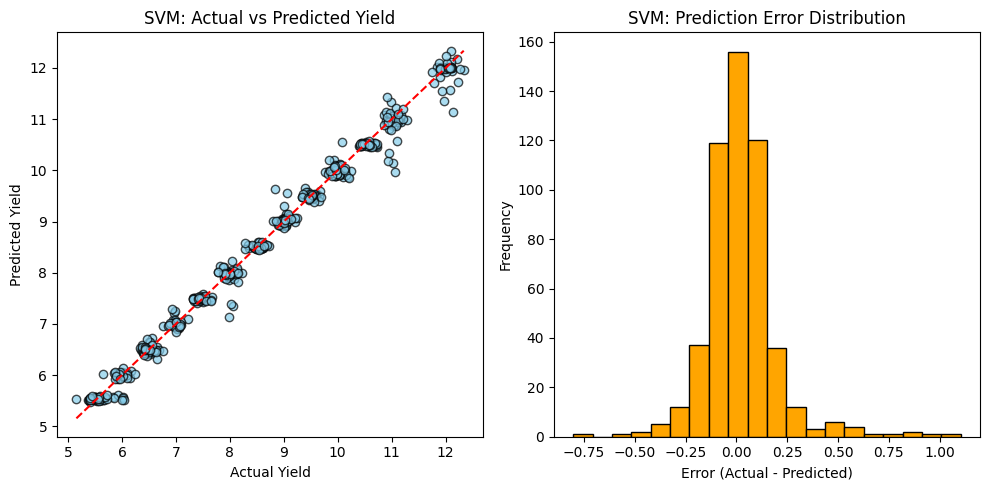

   Actual Yield  Predicted Yield
0      6.019040         5.967129
1      8.364318         8.484579
2     10.522461        10.551111
3      5.656995         6.021390
4      8.492420         8.497836
5     11.000000        10.888331
6      6.358882         6.482452
7      5.902084         5.939360
8     12.109238        11.997940
9      7.021662         6.940704


In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

for state in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state
    )

    model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    model_svr.fit(X_train, y_train)
    y_pred = model_svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

# --- Enhanced Visualization ---
plt.figure(figsize=(10,5))

# Scatter plot with trendline
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, color='skyblue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("SVM: Actual vs Predicted Yield")

# Error distribution
errors = y_test - y_pred
plt.subplot(1,2,2)
plt.hist(errors, bins=20, color='orange', edgecolor='black')
plt.title("SVM: Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

comparison = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})
print(comparison.head(10))


Best R² Score: 0.992
Mean Absolute Error: 0.120
Root Mean Squared Error: 0.174


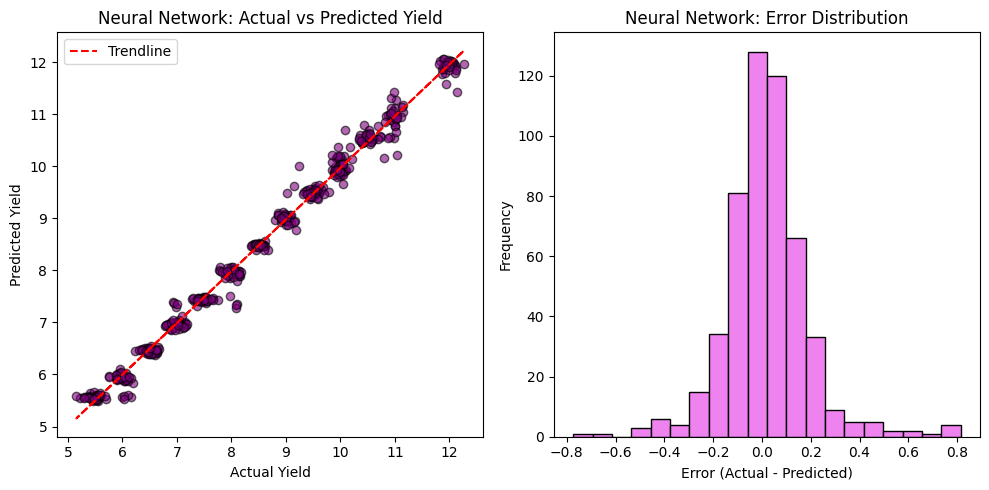

   Actual Yield  Predicted Yield
0      6.541877         6.453846
1      6.556415         6.464611
2      9.082729         9.020120
3      6.481056         6.452545
4      9.071932         9.053774
5      9.899696         9.885041
6      5.953626         6.029707
7      9.899946         9.981637
8     10.432959        10.458916
9     10.000000        10.015187


In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure X and y are numpy arrays
X = np.array(X)
y = np.array(y).ravel()  # Flatten in case y is a DataFrame/2D array

# Feature scaling (very important for neural networks)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Train-test loop
best_r2 = -1
best_model = None

for state in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=state
    )

    model = MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        learning_rate='adaptive',
        max_iter=1000,
        random_state=state
    )

    model.fit(X_train, y_train)
    y_pred_scaled = model.predict(X_test)

    # Inverse transform predictions and test labels
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    r2 = r2_score(y_test_original, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = (y_test_original, y_pred)

# Final metrics using best model
y_test, y_pred = best_model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best R² Score: {best_r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

# --- Enhanced Visualization ---
plt.figure(figsize=(10,5))

# Scatter plot with regression line
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, edgecolors='k')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--", label="Trendline")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Neural Network: Actual vs Predicted Yield")
plt.legend()

# Error distribution
errors = y_test - y_pred
plt.subplot(1,2,2)
plt.hist(errors, bins=20, color='violet', edgecolor='black')
plt.title("Neural Network: Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

comparison = pd.DataFrame({
    'Actual Yield': y_test,
    'Predicted Yield': y_pred
})
print(comparison.head(10))


In [8]:
import pickle

# Save all models
pickle.dump(model_lr, open('model_lr.pkl', 'wb'))
pickle.dump(rf_model, open('model_rf.pkl', 'wb'))
pickle.dump(model_xg, open('model_xg.pkl', 'wb'))
pickle.dump(model_svr, open('model_svr.pkl', 'wb'))
pickle.dump(model, open('model_nn.pkl', 'wb'))

print("✅ All 5 models saved successfully!")


✅ All 5 models saved successfully!


In [ ]:
# ----------------------------
# 🧠 User Input & Multi-Model Prediction
# ----------------------------
print("\n🌾 Enter input values to predict crop yield:\n")

fert = float(input("Enter Fertilizer used (kg/acre): "))
temp = float(input("Enter Temperature (°C): "))
N = float(input("Enter Nitrogen (N): "))
P = float(input("Enter Phosphorus (P): "))
K = float(input("Enter Potassium (K): "))

user_input = np.array([[fert, temp, N, P, K]])

# --- Predict with each model ---
pred_lr = model_lr.predict(user_input)[0]
pred_rf = rf_model.predict(user_input)[0]
pred_xg = model_xg.predict(user_input)[0]
pred_svr = model_svr.predict(user_input)[0]

# For Neural Network (requires scaling)
user_scaled = scaler_X.transform(user_input)
pred_mlp_scaled = model.predict(user_scaled)
pred_mlp = scaler_y.inverse_transform(pred_mlp_scaled.reshape(-1, 1))[0][0]

# --- Display results ---
print("\n📊 Predicted Crop Yields from All Models:")
print(f"Linear Regression: {pred_lr:.3f}")
print(f"Random Forest:     {pred_rf:.3f}")
print(f"XGBoost:           {pred_xg:.3f}")
print(f"SVM (RBF):         {pred_svr:.3f}")
print(f"Neural Network:    {pred_mlp:.3f}")

# Optional: show in DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "SVM", "Neural Network"],
    "Predicted Yield": [pred_lr, pred_rf, pred_xg, pred_svr, pred_mlp]
})

print("\n")
print(results)



🌾 Enter input values to predict crop yield:

